<a href="https://colab.research.google.com/github/salman0013/IoT/blob/master/House_Prices_Prediction_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
''' importing dataset'''

df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')
df1 = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
y = df['SalePrice']

In [ ]:
df = df.drop(['SalePrice'],axis=1)

In [ ]:
df = df.drop(['Neighborhood'],axis=1)
df1 = df1.drop(['Neighborhood'],axis=1)

In [ ]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [ ]:
df1.columns.shape

(79,)

In [ ]:
for i in range(0,len(df.columns)):
  i

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64


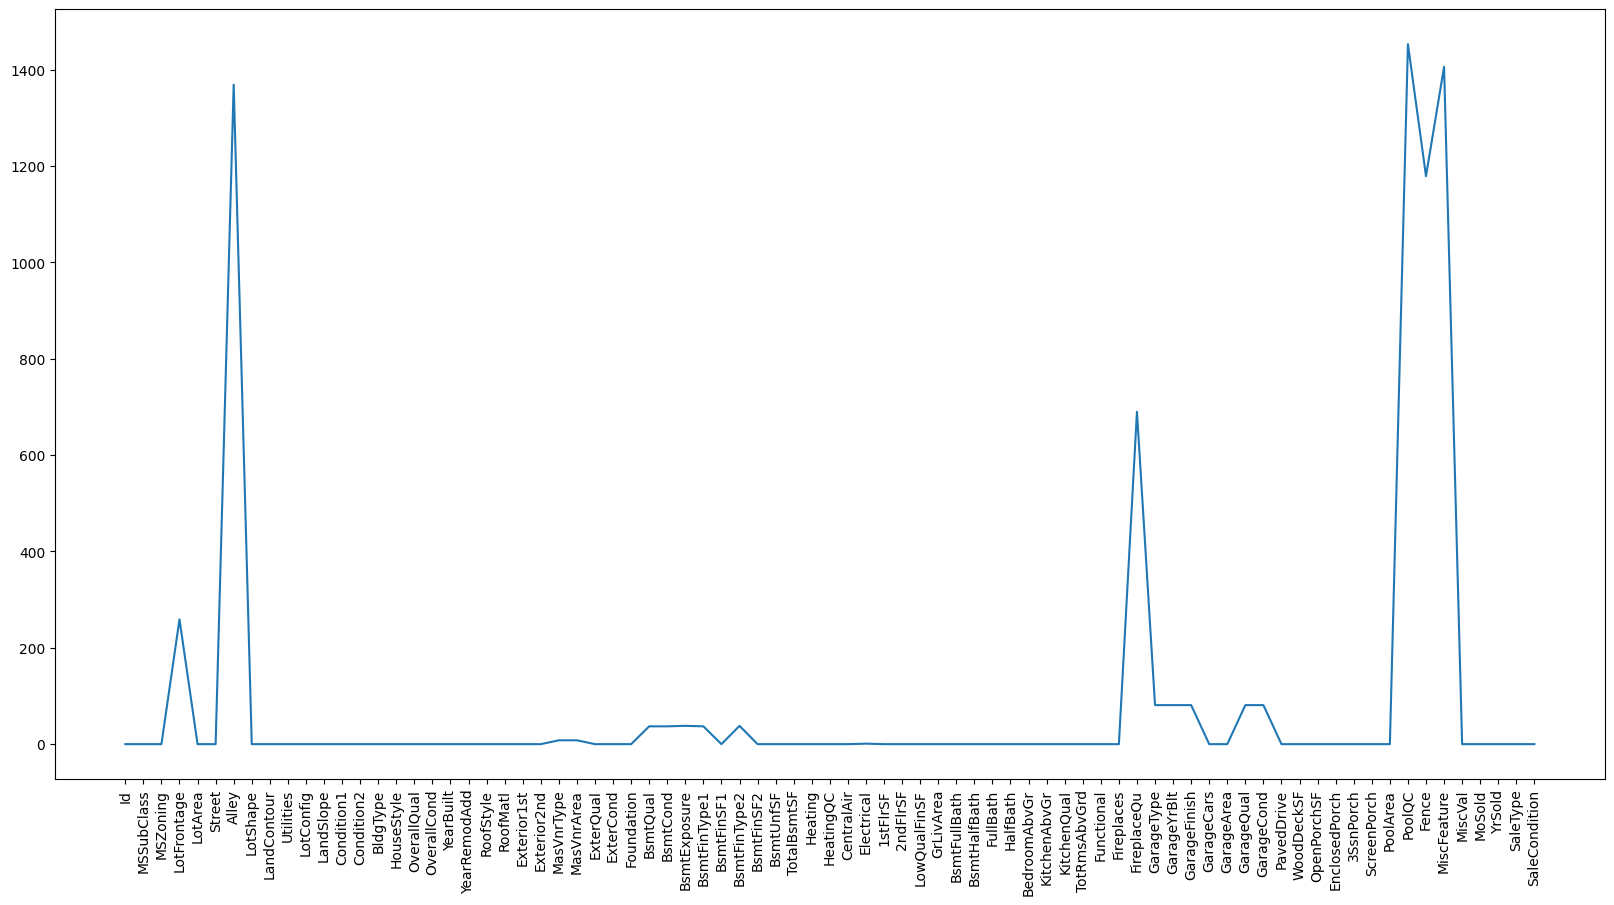

In [ ]:
''' finding null values '''

null_ = df.isnull().sum()
print(null_)

plt.figure(figsize=(20,10))

plt.xticks(rotation=90)
plt.plot(null_)
plt.show()

In [ ]:
df = df.drop(['Id'],axis=1)

In [ ]:
df1 = df1.drop(['Id'],axis=1)

In [ ]:
cat_col = df.select_dtypes(include='object').columns

In [ ]:
cat_col1 = df1.select_dtypes(include='object').columns

In [ ]:
len(df1['MSZoning'].unique())

6

In [ ]:
len(df['MSZoning'].unique())

5

In [ ]:
print(df.shape)
print(df1.shape)

(1460, 78)
(1459, 78)


In [ ]:
len(df[cat_col].columns)

42

In [ ]:
s = df.drop([cat_col[4]],axis=1)

In [ ]:
cat_col[0]

'MSZoning'

In [ ]:
s

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,AllPub,Corner,Gtl,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,AllPub,Inside,Gtl,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,AllPub,Inside,Gtl,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [ ]:
diff_col = set(df1[cat_col].columns) - set(df[cat_col].columns)

In [ ]:
print(diff_col)

set()


In [ ]:
''' Removing categorical columns for which values are different in both df and df1 '''


for j in range(0,len(df[cat_col].columns)):
  if len(df[cat_col[j]].unique())!=len(df1[cat_col[j]].unique()):
    df=df.drop([cat_col[j]],axis=1)
    df1=df1.drop([cat_col[j]],axis=1)


In [ ]:
df.shape

(1460, 65)

In [ ]:
df1.shape

(1459, 65)

In [ ]:
cat_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [ ]:
df.isnull().sum()

MSSubClass          0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
                 ... 
Fence            1179
MiscVal             0
MoSold              0
YrSold              0
SaleCondition       0
Length: 65, dtype: int64

In [ ]:
for ftr in df.columns:
  if df[ftr].isnull().sum()!=0:
    df[ftr]=df[ftr].fillna(df[ftr].mode()[0])

    print('nan')
#modes = [ftr for ftr in df.columns: ftr.mode()[0]]

In [ ]:
for ftr1 in df1.columns:
  if df1[ftr1].isnull().sum()!=0:
    df1[ftr1]=df1[ftr1].fillna(df1[ftr1].mode()[0])

    print('nan')

In [ ]:
f1 = [df,df1]
df3 = pd.concat(f1)

In [ ]:
cat_col = df3.select_dtypes(include='object').columns

In [ ]:
df3

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition
0,60,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,MnPrv,0,2,2008,Normal
1,20,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,MnPrv,0,5,2007,Normal
2,60,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,MnPrv,0,9,2008,Normal
3,70,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,MnPrv,0,2,2006,Abnorml
4,60,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,MnPrv,0,12,2008,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,MnPrv,0,6,2006,Normal
1455,160,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,MnPrv,0,4,2006,Abnorml
1456,20,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,MnPrv,0,9,2006,Abnorml
1457,85,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,MnPrv,700,7,2006,Normal


In [ ]:
encoder_one_hot = OneHotEncoder(sparse=False)

In [ ]:
X_t_one_hot = encoder_one_hot.fit_transform(df3[cat_col])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_t_one_hot1 = encoder_one_hot.fit_transform(df3[cat_col])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.iloc[0:1460,:]

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition
0,60,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,MnPrv,0,2,2008,Normal
1,20,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,MnPrv,0,5,2007,Normal
2,60,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,MnPrv,0,9,2008,Normal
3,70,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,MnPrv,0,2,2006,Abnorml
4,60,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,MnPrv,0,12,2008,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,MnPrv,0,8,2007,Normal
1456,20,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,MnPrv,0,2,2010,Normal
1457,70,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,GdPrv,2500,5,2010,Normal
1458,20,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,MnPrv,0,4,2010,Normal


In [ ]:
df1.iloc[0:1460,:]

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition
0,20,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,MnPrv,0,6,2010,Normal
1,20,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,MnPrv,12500,6,2010,Normal
2,60,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,MnPrv,0,3,2010,Normal
3,60,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,MnPrv,0,6,2010,Normal
4,120,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,MnPrv,0,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,MnPrv,0,6,2006,Normal
1455,160,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,MnPrv,0,4,2006,Abnorml
1456,20,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,MnPrv,0,9,2006,Abnorml
1457,85,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,MnPrv,700,7,2006,Normal


In [ ]:
X_t_one_hot.shape

(2919, 140)

In [ ]:
train = X_t_one_hot[0:1460,:]

In [ ]:
test = X_t_one_hot[1460:2919,:]

In [ ]:
X_t_one_hot.shape

(2919, 140)

In [ ]:
train.shape

(1460, 140)

In [ ]:
test.shape

(1459, 140)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(train,y,test_size=0.2,random_state=40)

**Creating grid search to find best parameters for RandomForestRegressor**


In [ ]:
## Define Grid
grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}## show start time
print(datetime.now())## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(xtrain, ytrain)## show end time
print(datetime.now())
# prompt: how can I find parameters from CV_rfr which are optimal

# Get the best parameters from the grid search
#best_params = CV_rfr.best_params_
#print("Best parameters:", best_params)


2024-03-29 21:22:20.726419
2024-03-29 21:24:17.630483


In [ ]:
best_params = CV_rfr.best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 18}


In [ ]:
rgr = RandomForestRegressor(bootstrap=False, n_estimators=150, max_features='sqrt', max_depth=5, random_state=45)
rgr = rgr.fit(xtrain, ytrain)

In [ ]:
rgr = RandomForestRegressor(bootstrap=False, n_estimators=500, max_features='sqrt', max_depth=7, random_state=18)
rgr = rgr.fit(xtrain, ytrain)

In [ ]:
pred_ = rgr.predict(xtest)

In [ ]:
score= mean_squared_error(ytest,pred_)
score**0.5

43165.57064710981

In [ ]:
pred_.shape

(1459,)

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
id = np.array([sample['Id']])

In [ ]:
a1 = np.vstack((Id,pred_))

In [ ]:
a1 = np.transpose(a1)

**Saving predictions file to google drive as csv**

In [ ]:
np.savetxt("/content/drive/MyDrive/house-prices-advanced-regression-techniques/submission.csv",a1,delimiter=",")

In [ ]:
a1 = np.array([sample['Id'],])

dtype('float64')

In [ ]:
pred_ = rgr.predict(xtest)